# We are going to run a Linear Regression on a Car Dekho Dataset using Ordinary Least Square method from Statsmodels Library

In [4]:
import pandas as pd
import numpy as np

In [5]:
import statsmodels.formula.api as sm

In [7]:
df=pd.read_csv('Car_sales.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [ ]:
df.info()

In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


<AxesSubplot:>

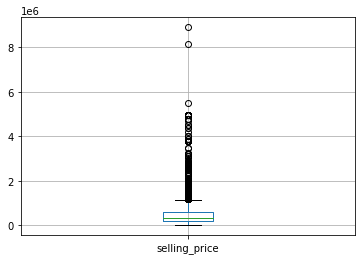

In [8]:
df.boxplot(['selling_price'])

In [9]:
#Function for Outlier Removal

def quartile(data,age):
    Q1=data[age].quantile(0.25)
    Q3=data[age].quantile(0.75)
    IQR=Q3-Q1
    data=df.loc[~((data[age]<(Q1-1.5*IQR)) | (data[age]>(Q3+1.5*IQR))),]
    return data

In [10]:
df=quartile(df,"selling_price")

<AxesSubplot:>

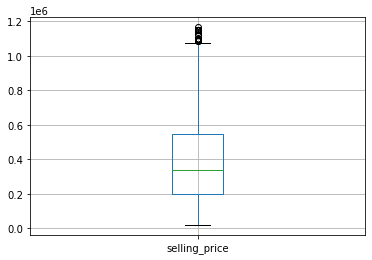

In [11]:
df.boxplot(['selling_price'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4069 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4069 non-null   object
 1   year           4069 non-null   int64 
 2   selling_price  4069 non-null   int64 
 3   km_driven      4069 non-null   int64 
 4   fuel           4069 non-null   object
 5   seller_type    4069 non-null   object
 6   transmission   4069 non-null   object
 7   owner          4069 non-null   object
dtypes: int64(3), object(5)
memory usage: 286.1+ KB


<AxesSubplot:>

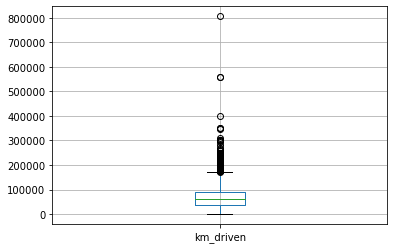

In [13]:
df.boxplot(['km_driven'])

In [14]:
df=quartile(df,"km_driven")

<AxesSubplot:>

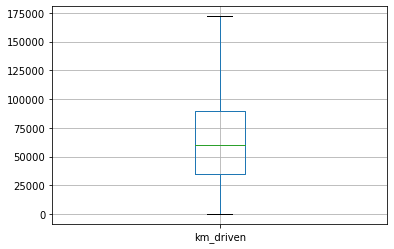

In [15]:
df.boxplot(['km_driven'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3962 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3962 non-null   object
 1   year           3962 non-null   int64 
 2   selling_price  3962 non-null   int64 
 3   km_driven      3962 non-null   int64 
 4   fuel           3962 non-null   object
 5   seller_type    3962 non-null   object
 6   transmission   3962 non-null   object
 7   owner          3962 non-null   object
dtypes: int64(3), object(5)
memory usage: 278.6+ KB


In [17]:
df.corr()

,year,selling_price,km_driven
year,1.000000,0.630198,-0.457385
selling_price,0.630198,1.000000,-0.285932
km_driven,-0.457385,-0.285932,1.000000


In [18]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [19]:
#df['name'].value_counts()

In [19]:
df['fuel'].value_counts()

Petrol    2081
Diesel    1817
Others      64
Name: fuel, dtype: int64

In [21]:
df['seller_type']. value_counts()

Individual          3018
Dealer               855
Trustmark Dealer      89
Name: seller_type, dtype: int64

In [20]:
df['transmission']. value_counts()

Manual       3709
Automatic     253
Name: transmission, dtype: int64

In [21]:
df['owner']. value_counts()

First Owner     2551
Second Owner    1052
Third Owner      269
Others            90
Name: owner, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3962 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3962 non-null   object
 1   year           3962 non-null   int64 
 2   selling_price  3962 non-null   int64 
 3   km_driven      3962 non-null   int64 
 4   fuel           3962 non-null   object
 5   seller_type    3962 non-null   object
 6   transmission   3962 non-null   object
 7   owner          3962 non-null   object
dtypes: int64(3), object(5)
memory usage: 278.6+ KB


In [23]:
df=pd.get_dummies(data=df, columns=['fuel', 'seller_type','transmission','owner'],drop_first=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3962 entries, 0 to 4339
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   name                          3962 non-null   object
 1   year                          3962 non-null   int64 
 2   selling_price                 3962 non-null   int64 
 3   km_driven                     3962 non-null   int64 
 4   fuel_Others                   3962 non-null   uint8 
 5   fuel_Petrol                   3962 non-null   uint8 
 6   seller_type_Individual        3962 non-null   uint8 
 7   seller_type_Trustmark Dealer  3962 non-null   uint8 
 8   transmission_Manual           3962 non-null   uint8 
 9   owner_Others                  3962 non-null   uint8 
 10  owner_Second Owner            3962 non-null   uint8 
 11  owner_Third Owner             3962 non-null   uint8 
dtypes: int64(3), object(1), uint8(8)
memory usage: 185.7+ KB


In [25]:
df.rename(columns = {'owner_Fourth & Above Owner':'owner_Fourth Above Owner'}, inplace = True)

In [27]:
lr=sm.ols(formula=
             "selling_price~km_driven+year+Q('fuel_Others')+Q('fuel_Petrol')+Q('seller_type_Individual')+Q('seller_type_Trustmark Dealer')+Q('transmission_Manual')+Q('owner_Others')+Q('owner_Second Owner')+Q('owner_Third Owner')",
             data=df).fit()
lr.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     459.4
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        00:24:24   Log-Likelihood:                -53314.
No. Observations:                3962   AIC:                         1.067e+05
Df Residuals:                    3951   BIC:                         1.067e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -5.786e+07    1.6e+06    -36.063      0.000    -6.1e+07   -5.47e+07
km_driven                            -0.7767      0.095     -8.169      0.000      -0.963      -0.590
year                                2.91e+04    794.747     36.617      0.000    2.75e+04    3.07e+04
Q('fuel_Others')                  -1.988e+05   2.16e+04     -9.219      0.000   -2.41e+05   -1.57e+05
Q('fuel_Petrol')                  -1.683e+05   6077.572    -27.691      0.000    -1.8e+05   -1.56e+05
Q('seller_type_Individual')       -3.299e+04   6876.619     -4.797      0.000   -4.65e+04   -1.95e+04
Q('seller_type_Trustmark Dealer')  1.744e+05   1.89e+04      9.223      0.000    1.37e+05    2.11e+05
Q('transmission_Manual')          -1.695e+05   1.12e+04    -15.139      0.000   -1.91e+05   -1.48e+05
Q('owner_Others')                  2.568e+04   1.85e+04      1.385      0.166   -1.07e+04     6.2e+04
Q('owner_Second Owner')           -1.583e+04   6826.159     -2.320      0.020   -2.92e+04   -2450.790
Q('owner_Third Owner')            -3.256e+04   1.16e+04     -2.796      0.005   -5.54e+04   -9725.890
==============================================================================
Omnibus:                      539.127   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.700
Skew:                           0.896   Prob(JB):                    2.40e-204
Kurtosis:                       4.570   Cond. No.                     4.34e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Linear Regression
Anova (p value should be less than .05)
H0: All coeff = 0
H1 : At least one of the coeff is not = 0


In [29]:
# as (Prob (F-statistic): 0.00)P Value is less than 0.05, we reject null hypothesis

In [30]:
# Now we will check individual P value. We noticed that there few ind variables. which have p value greater than 0.05. We check corresponding t value and remove indepent variable with highest absolute t value.

In [28]:
df=df.drop("owner_Second Owner", axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3962 entries, 0 to 4339
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   name                          3962 non-null   object
 1   year                          3962 non-null   int64 
 2   selling_price                 3962 non-null   int64 
 3   km_driven                     3962 non-null   int64 
 4   fuel_Others                   3962 non-null   uint8 
 5   fuel_Petrol                   3962 non-null   uint8 
 6   seller_type_Individual        3962 non-null   uint8 
 7   seller_type_Trustmark Dealer  3962 non-null   uint8 
 8   transmission_Manual           3962 non-null   uint8 
 9   owner_Others                  3962 non-null   uint8 
 10  owner_Third Owner             3962 non-null   uint8 
dtypes: int64(3), object(1), uint8(7)
memory usage: 181.8+ KB


In [30]:
lr=sm.ols(formula=
             "selling_price~km_driven+year+Q('fuel_Others')+Q('fuel_Petrol')+Q('seller_type_Individual')+Q('seller_type_Trustmark Dealer')+Q('transmission_Manual')+Q('owner_Others')+Q('owner_Third Owner')",
             data=df).fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     509.2
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        00:24:47   Log-Likelihood:                -53317.
No. Observations:                3962   AIC:                         1.067e+05
Df Residuals:                    3952   BIC:                         1.067e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -5.881e+07   1.55e+06    -37.879      0.000   -6.18e+07   -5.58e+07
km_driven                            -0.8049      0.094     -8.532      0.000      -0.990      -0.620
year                               2.957e+04    768.981     38.454      0.000    2.81e+04    3.11e+04
Q('fuel_Others')                  -2.001e+05   2.16e+04     -9.277      0.000   -2.42e+05   -1.58e+05
Q('fuel_Petrol')                  -1.681e+05   6080.458    -27.649      0.000    -1.8e+05   -1.56e+05
Q('seller_type_Individual')       -3.541e+04   6800.359     -5.208      0.000   -4.87e+04   -2.21e+04
Q('seller_type_Trustmark Dealer')  1.747e+05   1.89e+04      9.237      0.000    1.38e+05    2.12e+05
Q('transmission_Manual')          -1.689e+05   1.12e+04    -15.082      0.000   -1.91e+05   -1.47e+05
Q('owner_Others')                  3.291e+04   1.83e+04      1.801      0.072   -2925.784    6.88e+04
Q('owner_Third Owner')            -2.465e+04   1.11e+04     -2.212      0.027   -4.65e+04   -2806.637
==============================================================================
Omnibus:                      535.309   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              922.927
Skew:                           0.895   Prob(JB):                    3.88e-201
Kurtosis:                       4.545   Cond. No.                     4.20e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Now we will check individual P value. We noticed that there few ind variables. which have p value greater than 0.05. We check corresponding t value and remove indepent variable with highest absolute t value.

In [34]:
#P value of independent variable (p value should be less than .05)
#H0: the coeff = 0
#H1 : the coeff not = 0


In [31]:
df=df.drop("owner_Others", axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3962 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   name                          3962 non-null   object
 1   year                          3962 non-null   int64 
 2   selling_price                 3962 non-null   int64 
 3   km_driven                     3962 non-null   int64 
 4   fuel_Others                   3962 non-null   uint8 
 5   fuel_Petrol                   3962 non-null   uint8 
 6   seller_type_Individual        3962 non-null   uint8 
 7   seller_type_Trustmark Dealer  3962 non-null   uint8 
 8   transmission_Manual           3962 non-null   uint8 
 9   owner_Third Owner             3962 non-null   uint8 
dtypes: int64(3), object(1), uint8(6)
memory usage: 178.0+ KB


In [33]:
lr=sm.ols(formula=
             "selling_price~km_driven+year+Q('fuel_Others')+Q('fuel_Petrol')+Q('seller_type_Individual')+Q('seller_type_Trustmark Dealer')+Q('transmission_Manual')+Q('owner_Third Owner')",
             data=df).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     572.2
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        00:25:10   Log-Likelihood:                -53318.
No. Observations:                3962   AIC:                         1.067e+05
Df Residuals:                    3953   BIC:                         1.067e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -5.848e+07   1.54e+06    -37.919      0.000   -6.15e+07   -5.55e+07
km_driven                            -0.8026      0.094     -8.505      0.000      -0.988      -0.618
year                               2.941e+04    763.862     38.498      0.000    2.79e+04    3.09e+04
Q('fuel_Others')                  -1.989e+05   2.16e+04     -9.222      0.000   -2.41e+05   -1.57e+05
Q('fuel_Petrol')                   -1.68e+05   6081.556    -27.618      0.000    -1.8e+05   -1.56e+05
Q('seller_type_Individual')       -3.539e+04   6802.275     -5.203      0.000   -4.87e+04   -2.21e+04
Q('seller_type_Trustmark Dealer')  1.744e+05   1.89e+04      9.217      0.000    1.37e+05    2.11e+05
Q('transmission_Manual')          -1.687e+05   1.12e+04    -15.067      0.000   -1.91e+05   -1.47e+05
Q('owner_Third Owner')            -2.619e+04   1.11e+04     -2.357      0.018    -4.8e+04   -4403.427
==============================================================================
Omnibus:                      537.589   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              925.402
Skew:                           0.899   Prob(JB):                    1.13e-201
Kurtosis:                       4.541   Cond. No.                     4.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
## We have able to eliminate all independent variables with p value greater than 0.05.

In [39]:
## We will now check R Square and Adjusted R Square.
#R square	0-1; closer to 1 better the model
# Adjusted R Square is close to R Square implying that the data does not unwanted independent variable.
#R-squared:0.537
#Adj. R-squared:0.536

In [40]:
#Now we will check VIF(Variance Inflation Factor)should be less than 2


In [36]:
var=pd.DataFrame(round(lr.pvalues,3))
lr.rsquared
var["coeff"]=lr.params

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=lr.model.exog
vif=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif
var['vif']=vif
var

,0,coeff,vif
Intercept,0.000,-5.847764e+07,328608.419212
km_driven,0.000,-8.026140e-01,1.614066
year,0.000,2.940743e+04,1.440609
Q('fuel_Others'),0.000,-1.988901e+05,1.021459
Q('fuel_Petrol'),0.000,-1.679618e+05,1.274297
Q('seller_type_Individual'),0.000,-3.538996e+04,1.160326
Q('seller_type_Trustmark Dealer'),0.000,1.743934e+05,1.086097
Q('transmission_Manual'),0.000,-1.687457e+05,1.036071
Q('owner_Third Owner'),0.018,-2.618895e+04,1.079657


In [42]:
# VIF for all the variable is less than 2. Hence, concluding that VIF is good.

In [43]:
# We will now check MAPE.
#MAPE	0-1; closer to 0 better the model


In [38]:
df["pred"] = lr.predict()
df.head()

,name,year,selling_price,km_driven,fuel_Others,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Third Owner,pred
0,Maruti 800 AC,2007,60000,70000,0,1,1,0,1,0,114780.286424
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,1,0,1,0,130832.566914
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,1,0,1,0,405700.813798
3,Datsun RediGO T Option,2017,250000,46000,0,1,1,0,1,0,428117.285296
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,1,0,1,0,431608.491250


In [39]:
df["mp"]=abs((df["selling_price"]-df["pred"])/df["selling_price"])
(df.mp.mean())*100 # MAPE

48.52908704670707

## Since MAPE is very high using OLS from Statsmodels, we will need to run further Alogorithms to get better result.

## Sharing future steps for OLS just for documentations

In [40]:
df["mp"].dtypes

dtype('float64')

In [47]:
# MAPE is more than 20%. Please check with AE

In [42]:
## Normality test uing shapiro and normal test
from scipy import stats
stats.shapiro(lr.resid)



ShapiroResult(statistic=0.9596198201179504, pvalue=7.442816455395235e-32)

In [44]:
from scipy.stats import normaltest
normaltest(lr.resid)

NormaltestResult(statistic=537.5886926288441, pvalue=1.8369554710136054e-117)

In [45]:
# Checking for autocorrelation
from statsmodels.stats import diagnostic as diag
diag.acorr_ljungbox(lr.resid , lags=1)

#Check as P Value is less than 0.05 where it should be greater than 0.05

,lb_stat,lb_pvalue
1,23.39024,0.000001


In [46]:
# Checking heterostasticty

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [47]:
name=['F statistic','p-value']
test=sms.het_goldfeldquandt(lr.resid, lr.model.exog)
lzip(name,test)

[('F statistic', 1.1120436640470042), ('p-value', 0.009207698979315698)]

In [48]:
name=['Lagrange multiplier statistic', 'p-value','f-value','f p-value']
test = sms.het_breuschpagan(lr.resid, lr.model.exog)
lzip(name, test)

#Check as P Value is less than 0.05 where it should be greater than 0.05

[('Lagrange multiplier statistic', 174.64257051336153),
 ('p-value', 1.3710737036814018e-33),
 ('f-value', 22.785084788422456),
 ('f p-value', 2.2996393941677194e-34)]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3962 entries, 0 to 4339
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          3962 non-null   object 
 1   year                          3962 non-null   int64  
 2   selling_price                 3962 non-null   int64  
 3   km_driven                     3962 non-null   int64  
 4   fuel_Others                   3962 non-null   uint8  
 5   fuel_Petrol                   3962 non-null   uint8  
 6   seller_type_Individual        3962 non-null   uint8  
 7   seller_type_Trustmark Dealer  3962 non-null   uint8  
 8   transmission_Manual           3962 non-null   uint8  
 9   owner_Third Owner             3962 non-null   uint8  
 10  pred                          3962 non-null   float64
 11  mp                            3962 non-null   float64
dtypes: float64(2), int64(3), object(1), uint8(6)
memory usage: 239

In [50]:
df.to_csv('CarDekhoPred.csv',index=False)

## We will now be trying other Regression Algorithms to see if we can enhance MAPE

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

df1=pd.read_csv('Car_sales.csv')
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [53]:
#Function for Outlier Removal

def quartile(data,age):
    Q1=data[age].quantile(0.25)
    Q3=data[age].quantile(0.75)
    IQR=Q3-Q1
    data=df1.loc[~((data[age]<(Q1-1.5*IQR)) | (data[age]>(Q3+1.5*IQR))),]
    return data


<AxesSubplot:>

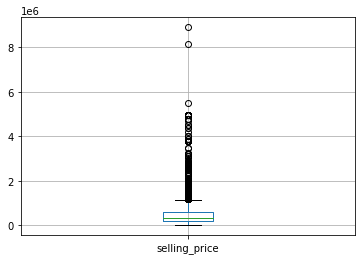

In [54]:
df1.boxplot(['selling_price'])

In [56]:
df1=quartile(df1,"selling_price")

<AxesSubplot:>

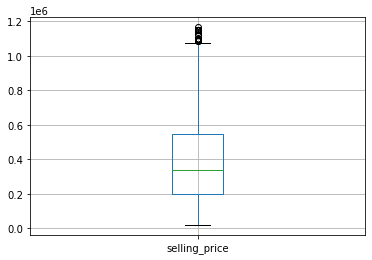

In [57]:
df1.boxplot(['selling_price'])

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4069 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4069 non-null   object
 1   year           4069 non-null   int64 
 2   selling_price  4069 non-null   int64 
 3   km_driven      4069 non-null   int64 
 4   fuel           4069 non-null   object
 5   seller_type    4069 non-null   object
 6   transmission   4069 non-null   object
 7   owner          4069 non-null   object
dtypes: int64(3), object(5)
memory usage: 286.1+ KB


<AxesSubplot:>

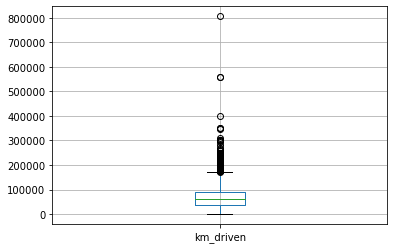

In [59]:
df1.boxplot(['km_driven'])

In [60]:
df1=quartile(df1,"km_driven")

<AxesSubplot:>

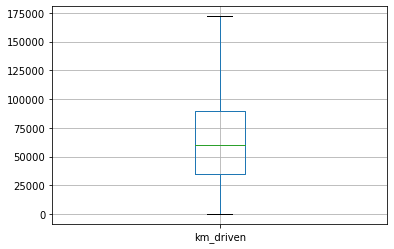

In [61]:
df1.boxplot(['km_driven'])

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3962 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3962 non-null   object
 1   year           3962 non-null   int64 
 2   selling_price  3962 non-null   int64 
 3   km_driven      3962 non-null   int64 
 4   fuel           3962 non-null   object
 5   seller_type    3962 non-null   object
 6   transmission   3962 non-null   object
 7   owner          3962 non-null   object
dtypes: int64(3), object(5)
memory usage: 278.6+ KB


<AxesSubplot:>

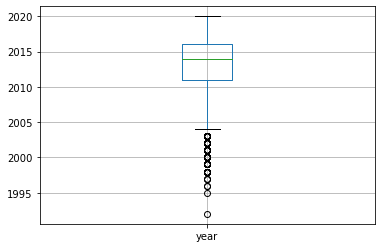

In [63]:
df1.boxplot(['year'])

In [64]:
df1=quartile(df1,"year")

<AxesSubplot:>

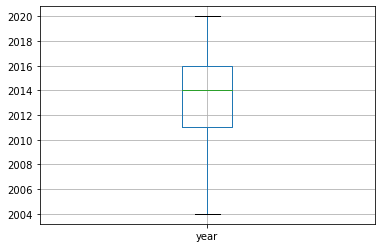

In [65]:
df1.boxplot(['year'])

In [66]:
## Importing Library for LabelEncoder to convert Categorical Variables into dummies.
from sklearn.preprocessing import LabelEncoder

In [67]:
# Create an instance of the one-hot encoder
encoder = LabelEncoder()

In [68]:
# Fit and transform the encoder on the list of values
encoder.fit(df1["fuel"])
df1["fuel"]=encoder.transform(df1["fuel"])

In [69]:
# Fit and transform the encoder on the list of values
encoder.fit(df1["seller_type"])
df1["seller_type"]=encoder.transform(df1["seller_type"])

In [70]:
# Fit and transform the encoder on the list of values
encoder.fit(df1["transmission"])
df1["transmission"]=encoder.transform(df1["transmission"])

In [71]:
# Fit and transform the encoder on the list of values
encoder.fit(df1["owner"])
df1["owner"]=encoder.transform(df1["owner"])

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3858 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3858 non-null   object
 1   year           3858 non-null   int64 
 2   selling_price  3858 non-null   int64 
 3   km_driven      3858 non-null   int64 
 4   fuel           3858 non-null   int32 
 5   seller_type    3858 non-null   int32 
 6   transmission   3858 non-null   int32 
 7   owner          3858 non-null   int32 
dtypes: int32(4), int64(3), object(1)
memory usage: 211.0+ KB


In [73]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [74]:
df1.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

<AxesSubplot:>

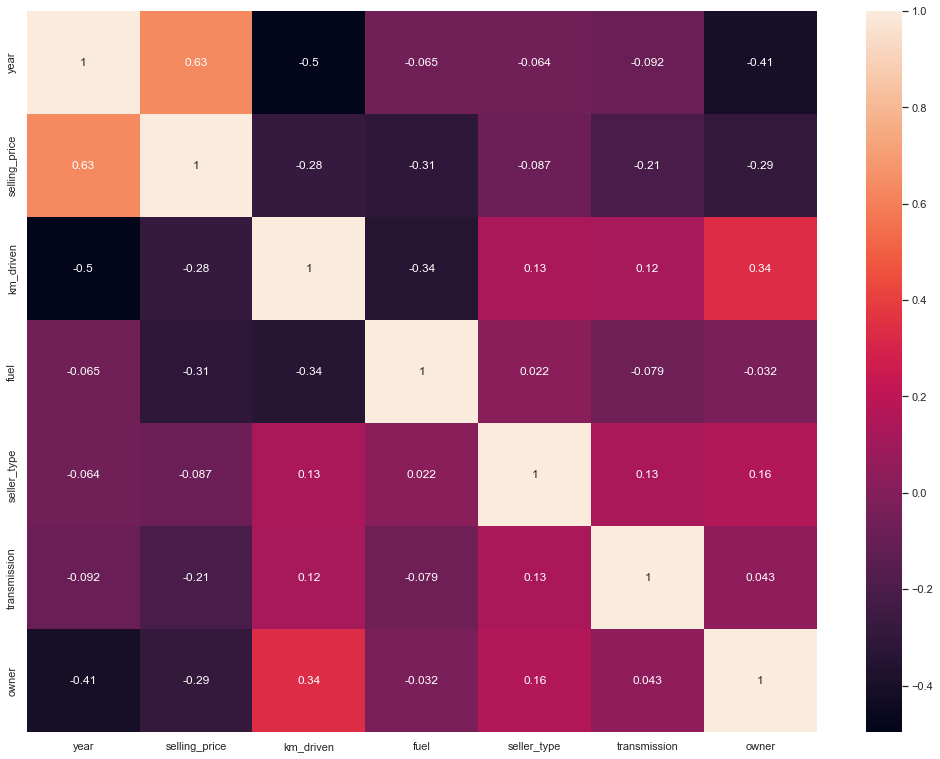

In [75]:
## Importing seaborn for graphical representation
import seaborn as sns
sns.set(rc={'figure.figsize':(17.7,13.27)})
sns.heatmap(df1.corr(),annot=True)

In [76]:
## All the independent values are showing have correlation 0.21(Absolute Value). We will proceed with all the variables

In [78]:
#segregate data into dependent and independent variables

X = df1.drop(["name","selling_price"], axis = 1)#independent variables
y = df1["selling_price"]#dependent variable

In [79]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,4,1,1,0
1,2007,50000,4,1,1,0
2,2012,100000,1,1,1,0
3,2017,46000,4,1,1,0
4,2014,141000,1,1,1,2


In [80]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [81]:
# Splitting it into training and testing (70% train & 30% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [82]:
# Feature Scaling. There are multiple packages in Python for Feature Scaling. We are going to use StandardScaler for this assignment
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [83]:
X_train

array([[ 0.99007132,  0.20449209, -1.02641198,  0.43667831,  0.25264558,
        -0.65640023],
       [-1.13298443, -0.98401148,  0.95971727, -1.77538818,  0.25264558,
        -0.65640023],
       [-1.66374837,  0.61913457,  0.95971727, -1.77538818,  0.25264558,
        -0.65640023],
       ...,
       [-0.33683852,  0.75734873, -1.02641198,  0.43667831,  0.25264558,
        -0.65640023],
       [-0.60222049,  1.5866337 , -1.02641198,  0.43667831,  0.25264558,
        -0.65640023],
       [ 1.25545329, -0.56950721, -1.02641198,  0.43667831,  0.25264558,
        -0.65640023]])

In [85]:
X_test

array([[ 0.72468935, -0.9012212 , -1.68845506,  0.43667831,  0.25264558,
         1.01556262],
       [-0.60222049, -0.07193623,  0.95971727,  0.43667831,  0.25264558,
         2.68752547],
       [ 0.99007132, -0.07193623, -1.02641198,  0.43667831,  0.25264558,
        -0.65640023],
       ...,
       [ 0.72468935, -0.34836455, -1.02641198,  0.43667831,  0.25264558,
        -0.65640023],
       [ 0.45930739, -0.21015039,  0.95971727,  0.43667831,  0.25264558,
        -0.65640023],
       [ 0.45930739, -0.76300704,  0.95971727,  0.43667831,  0.25264558,
        -0.65640023]])

In [86]:
y_train

2274     650000
2540     195000
2390     135000
799      350000
480      130000
3983     250000
521      350000
1230     195000
109      750000
327      800000
3063     335000
2087     400000
1802     615000
4123     130000
3462     300000
991      725000
621      750000
3529     470000
1706     145000
3296     400000
3385     350000
4111     155000
3427     600000
3412     250000
4272     495000
1603     125000
1752     221000
2154    1100000
4241     115999
2606     390000
1095     670000
4174     509999
4091     550000
3169      70000
2259     535000
1024    1140000
3642     600000
789      300000
1714     784000
473      490000
906      520000
2583     160000
1638     100000
2539     221000
3329     400000
3309     190000
2353     350000
312      180000
3408     125000
605       80000
606      385000
2024     385000
405      300000
1728     420000
1971    1100000
3373     690000
3506     229999
752      525000
1557     135000
3738      95000
4027     580000
3701     599000
3581    

In [87]:
y_test

2092     350000
1442     125000
3010     800000
2745     520000
3959     120000
3073     300000
1103     950000
3398     370000
422      300000
2966     500000
3524     350000
2697     300000
2620     200000
176      282000
1461     385000
3752     240000
2573     350000
3268     619000
4057     500000
3121     425000
2677     450000
1224     780000
1177     325000
15       600000
3137     114999
518      325000
2916    1000000
4129     330000
1736     400000
2504     240000
2478     396000
826      250000
3146     300000
2311     275000
2726     426000
3215      40000
3567     300000
2741     225000
2403     350000
1687     140000
2792     434999
1845     750000
1459     950000
3777     850000
2830     440000
780      400000
931       80000
4062     930000
2399     350000
210      685000
966      100000
1401     600000
659      250000
1608     330000
2205      90000
3949     750000
3769     200000
230      390000
3229     840000
3051     400000
1715     635000
2930     130000
2645    

In [89]:
#import the package
from sklearn.linear_model import LinearRegression
#initialize the model
lin_reg = LinearRegression()
#run the model on the dataset
lin_reg.fit(X_train, y_train)
#predict on the test data
y_pred = lin_reg.predict(X_test)

In [91]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)*100

45.87341098582019

In [92]:
from sklearn.tree import DecisionTreeRegressor 
dt = DecisionTreeRegressor(random_state = 42) 
dt.fit(X_train, y_train)
# Predict the model
y_pred = dt.predict(X_test)

In [93]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)*100

41.016700385213696

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_train, y_train)
# Predict the model
y_pred = rf.predict(X_test)

In [95]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)*100

38.00316775385744

In [98]:
!pip install xgboost

In [99]:
import xgboost as xg

In [98]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
n_estimators = 10, seed = 123)

In [99]:
# Fitting the model
xgb_r.fit(X_train, y_train)

[00:13:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [100]:
# Predict the model
y_pred = xgb_r.predict(X_test)

In [101]:
d = pd.DataFrame()
d["y_test"] = y_test
d["y_pred"] = y_pred

In [102]:
###### mape
d["mp"] = abs((d["y_test"]- d["y_pred"])/d["y_test"])
(d.mp.mean())*100#mape

36.1237402887294

In [103]:
df.to_csv('CarDekhoPredFinal.csv',index=False)#export data to local drive

## Conculsion:

We got a dataset for Car Dekho. We first did some data manipulation in the CSV File. We combined CNG, Electric and LPG together under Others.
We also combined Third Owner and Test Drive Cars under Others.


We then executed OLS(Oridnary Least Square Method) through Statsmodels. MAPE = 48.53%

Next we tried Linear Regression through Sklearn. MAPE = 45.77%

Next we tried Decision Tree Regressor through Sklearn. MAPE = 39.69%

Next we tried Random Forest Regressor through Sklearn. MAPE = 37.72%

Next we tried XGBoost Regressor. MAPE = 36.12%